In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [101]:
mtcars = pd.read_csv('mtcars.csv')

In [102]:
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,Manual,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,Manual,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,Manual,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,Automatic,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,Automatic,3,2


In [103]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,5.000000,8.0000


In [104]:
mtcars.columns

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

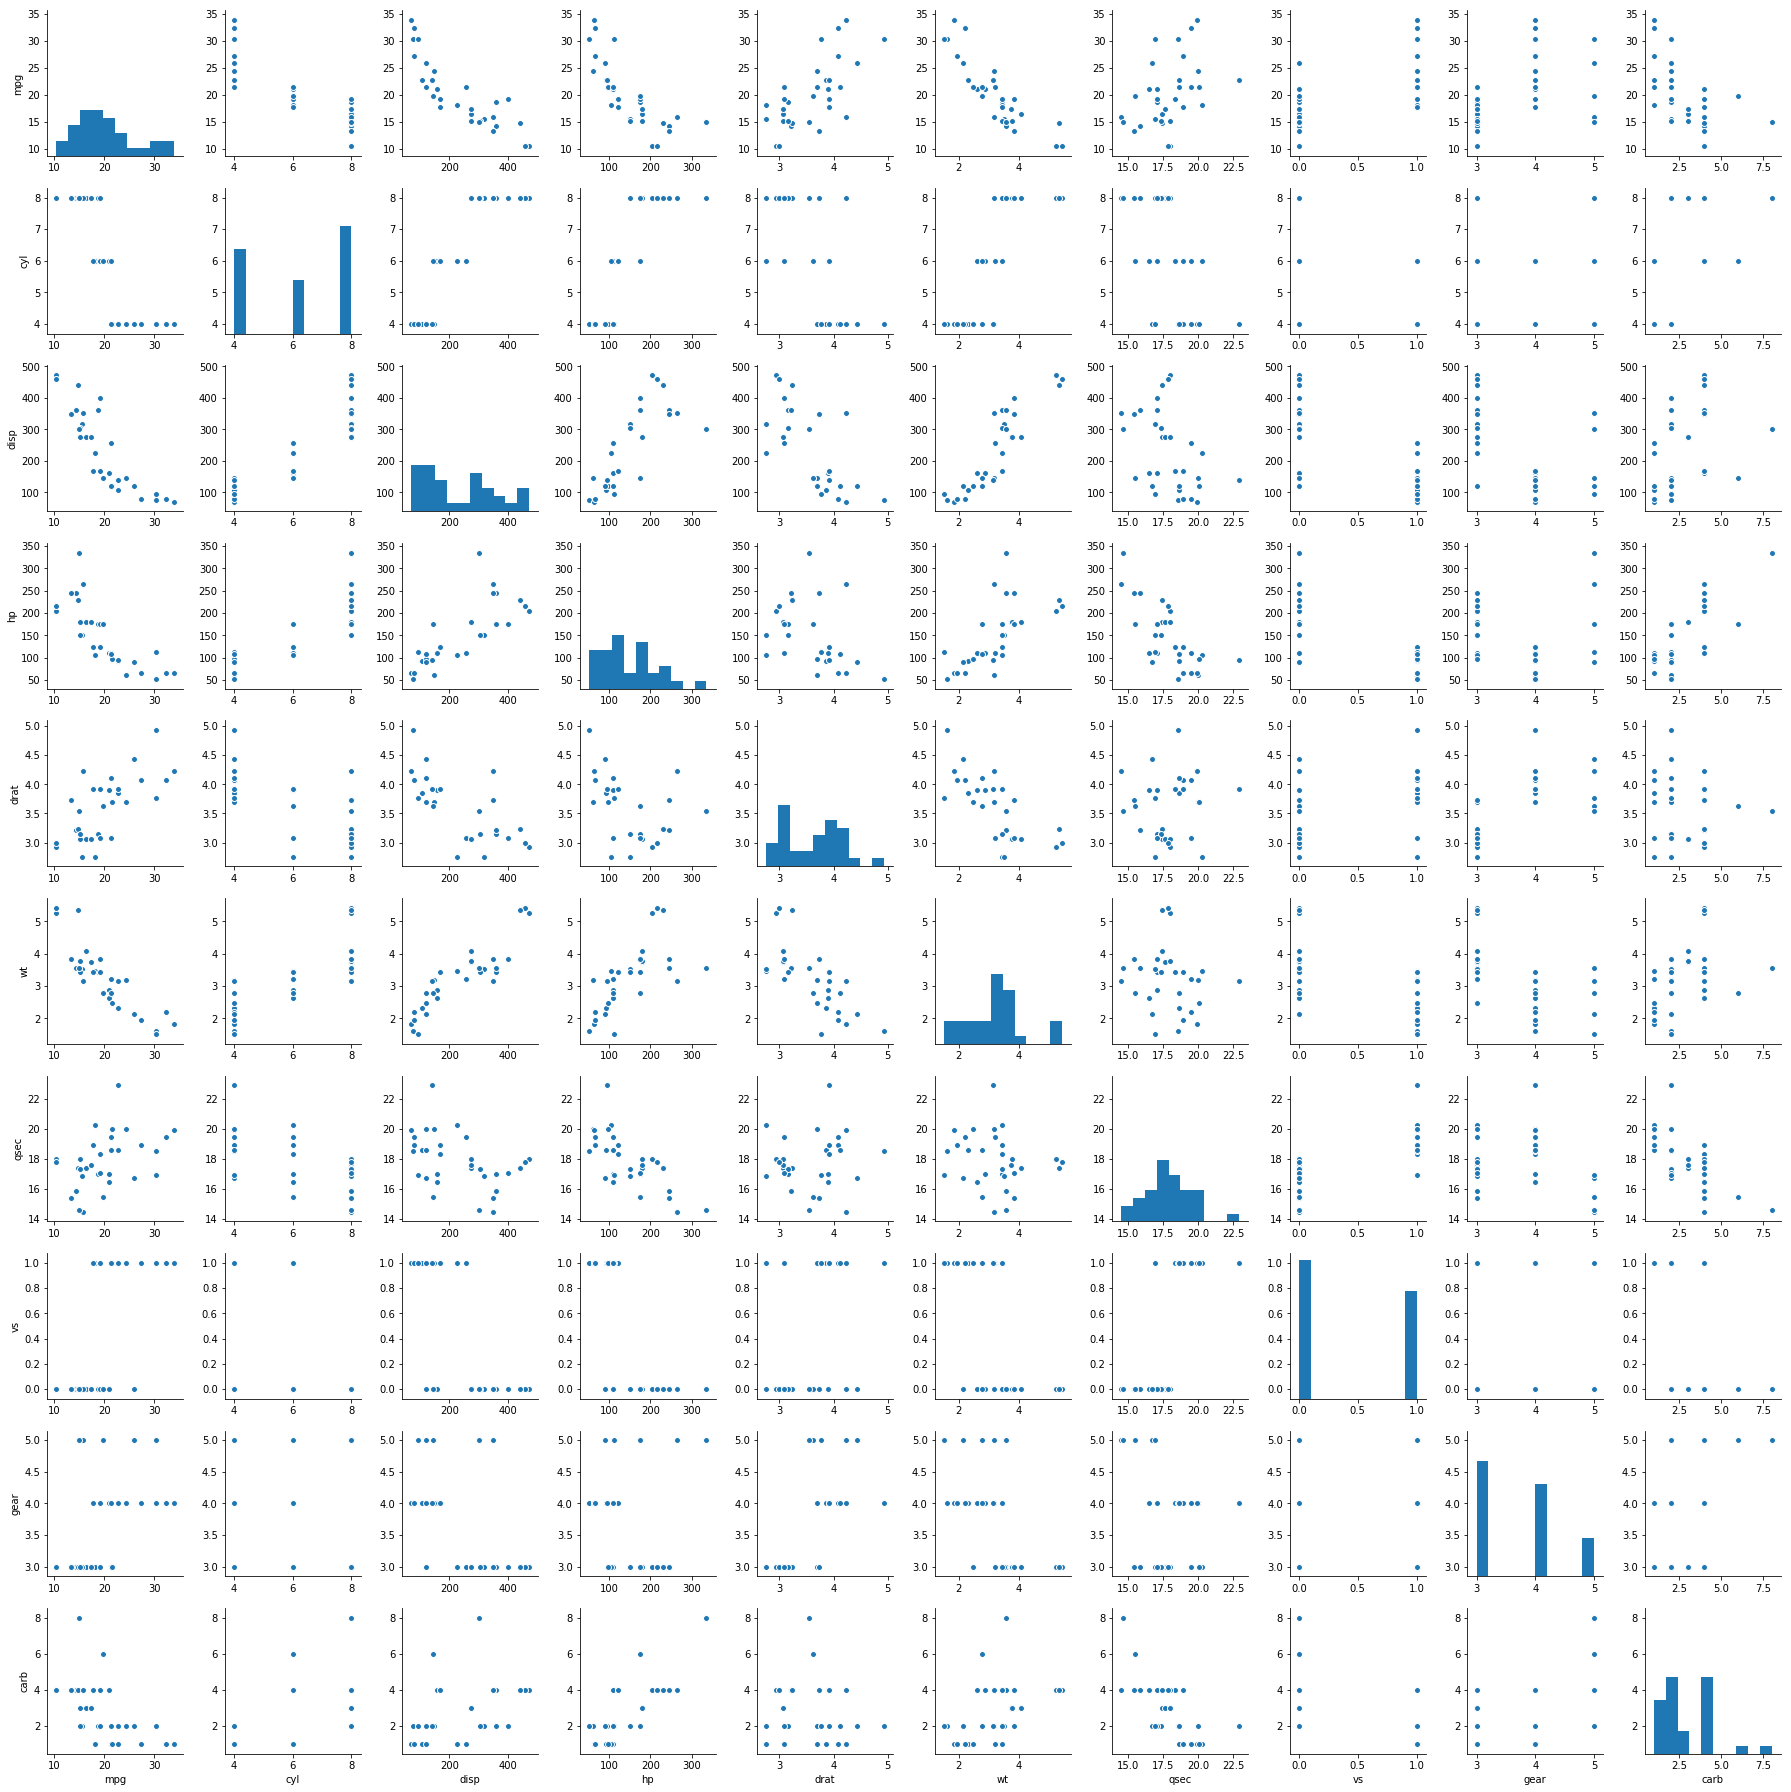

In [68]:
sns.pairplot(mtcars)

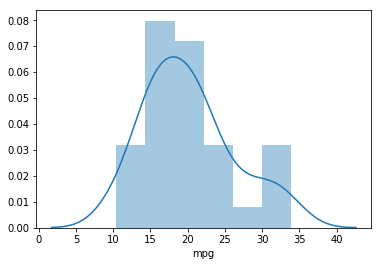

In [69]:
sns.distplot(mtcars['mpg'])

In [105]:
mtcars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.206023,-0.569607
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,1.000000,0.274073
carb,-0.550925,0.526988,0.394977,0.749812,-0.090790,0.427606,-0.656249,-0.569607,0.274073,1.000000


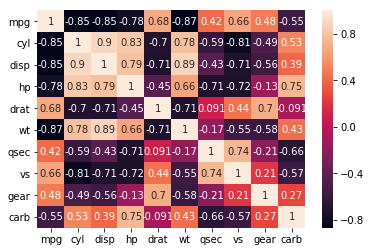

In [71]:
sns.heatmap(mtcars.corr(), annot=True)

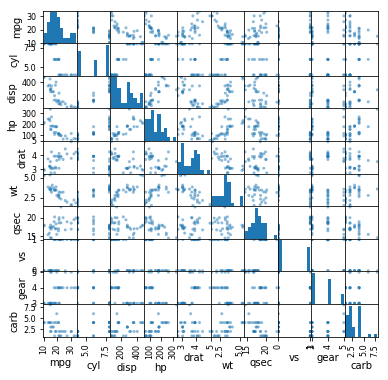

In [107]:
pd.plotting.scatter_matrix(mtcars, figsize=(6, 6))
plt.show()

In [72]:
X = mtcars[['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'carb']]
y =mtcars['mpg']

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
lm = LinearRegression()

In [77]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
print(lm.intercept_)

35.953154418


In [79]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
cyl,-0.779906
disp,0.005502
hp,-0.013168
drat,0.574501
wt,-4.258394
qsec,0.078175
carb,-0.129095


In [80]:
predictions = lm.predict(X_test)

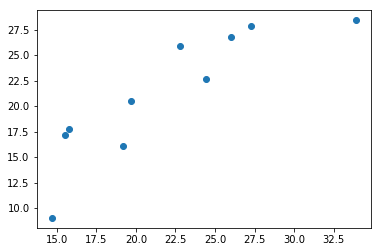

In [81]:
plt.scatter(y_test,predictions)

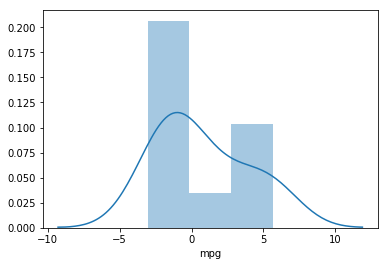

In [84]:
sns.distplot((y_test-predictions))

In [85]:
iris = pd.read_csv('iris_new.csv')

In [86]:
iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [87]:
iris.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,5.914000,3.041000,3.851000,1.21300
std,29.011492,0.856469,0.439489,1.785378,0.74558
min,1.000000,4.300000,2.000000,1.000000,0.10000
25%,25.750000,5.175000,2.800000,1.600000,0.37500
50%,50.500000,5.850000,3.000000,4.500000,1.40000
75%,75.250000,6.500000,3.300000,5.100000,1.80000
max,100.000000,7.900000,4.400000,6.900000,2.50000


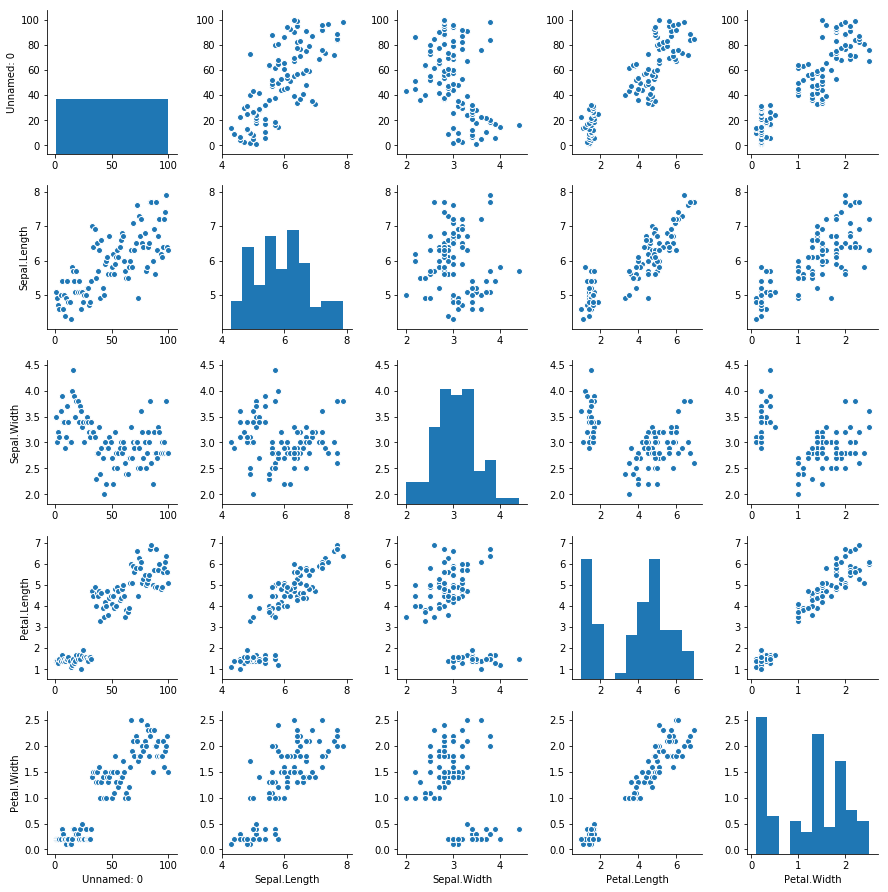

In [88]:
sns.pairplot(iris)

In [89]:
iris.corr()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Unnamed: 0,1.000000,0.735519,-0.425542,0.889291,0.885842
Sepal.Length,0.735519,1.000000,-0.105661,0.871159,0.800274
Sepal.Width,-0.425542,-0.105661,1.000000,-0.437935,-0.382657
Petal.Length,0.889291,0.871159,-0.437935,1.000000,0.964567
Petal.Width,0.885842,0.800274,-0.382657,0.964567,1.000000


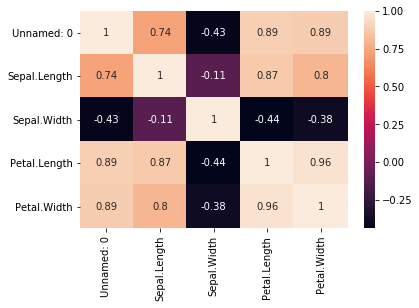

In [90]:
sns.heatmap(iris.corr(), annot=True)

In [91]:
X = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
y = iris['Species']

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.linear_model import LogisticRegression

In [95]:
glm = LogisticRegression()

In [96]:
glm.fit(X_train, y_train) # need help in this step on syntax

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [97]:
print(glm.intercept_)

[ 0.20222326  0.44682296 -0.64273789]


In [98]:
predictions = glm.predict(X_test)

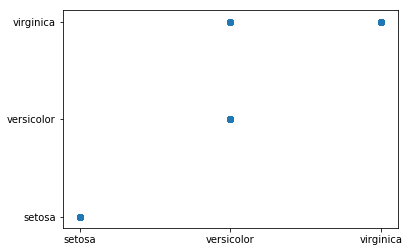

In [99]:
plt.scatter(y_test, predictions)